In [28]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt

# Lecture 5: Introduction to Option Pricing


## 1. Implement Black-Scholes formulas for option prices and deltas (in any programming language or spreadsheet). Prepare a short report

In [143]:
class BlackScholes:
    
    def __init__(
        self,
        strike_price: float,
        current_price: float,
        risk_free_interest_rate: float,
        time_to_maturity: float,
        sigma: float,
    ) -> None:
        """
        Args:
            strike_price (float): K
            current_price (float): S_0
            risk_free_interest_rate (float): r
            time_to_maturity (float): T
            sigma (float): standard deviation of log returns (volatility)
        """
        self._K = strike_price
        self._S = current_price
        self._r = risk_free_interest_rate
        self._T = time_to_maturity
        self._sigma = sigma

    @property
    def d_1(self) -> float:
        num = np.log(self._S / self._K) + (self._r  + (self._sigma ** 2) / 2) * self._T
        den = self._sigma * np.sqrt(self._T)
        return num / den
    
    @property
    def delta_call(self) -> float:
        return norm.cdf(self.d_1)
    
    @property
    def delta_put(self) -> float:
        return -norm.cdf(-self.d_1)
    
    def get_call_price(self) -> float:
        return self._S * norm.cdf(self.d_1) \
            - self._K * np.exp(-self._r * self._T) * norm.cdf(self.d_1 - self._sigma * np.sqrt(self._T))
    
    def get_put_price(self) -> float:
        return self._K * np.exp(-self._r * self._T) * norm.cdf(self._sigma * np.sqrt(self._T) - self.d_1) \
            -  self._S * norm.cdf(-self.d_1)
    
    def get_put_price_simpler(self) -> float:
        return self.get_call_price() + self._K / np.exp(self._r * self._T) - self._S

In [19]:
# test if model works
model = BlackScholes(
    strike_price=60,
    current_price=62,
    risk_free_interest_rate=0.04,
    time_to_maturity=40/365,
    sigma=0.32,
)

call_price = model.get_call_price()
put_price = model.get_put_price()
put_price2 = model.get_put_price_simpler()


print(f'call price: {call_price}')
print(f'put price: {put_price}')
print(f'put price (calculation used call price): {put_price2}')

call price: 3.858949125174327
put price: 1.5965110535188067
put price (calculation used call price): 1.5965110535188174


### a) Check your implementation: 
verify that the difference of the deltas for put and call for the
same stock price (𝑆) is 1 (for call – put) and the difference of their values is 𝑆 − 𝐾 (put-call
parity).

In [20]:
# verify delta call - delta put
model.delta_call - model.delta_put

1.0

In [26]:
# https://en.wikipedia.org/wiki/Put%E2%80%93call_parity
# https://en.wikipedia.org/wiki/Discounting#Discount_factor
# verify if C - P = S - D * K

print(model.get_call_price() - model.get_put_price())

S = 62
K = 60
D = 1 / (1 +  0.04 * 40 / 365)  # discount factor
print(S - D * K)

2.26243807165552
2.261865793780693


### b) In a spreadsheet, plot values of a call option (on one chart) as a function of stock price:
• for different times to maturity: 0.001 (almost at expiry), 0.5 and 1 year, for volatility
being 10% <br>
• include spots “left from” and “right to” the option strike (0 < 𝑆𝐿 < 𝐾 < 𝑆𝐻 )

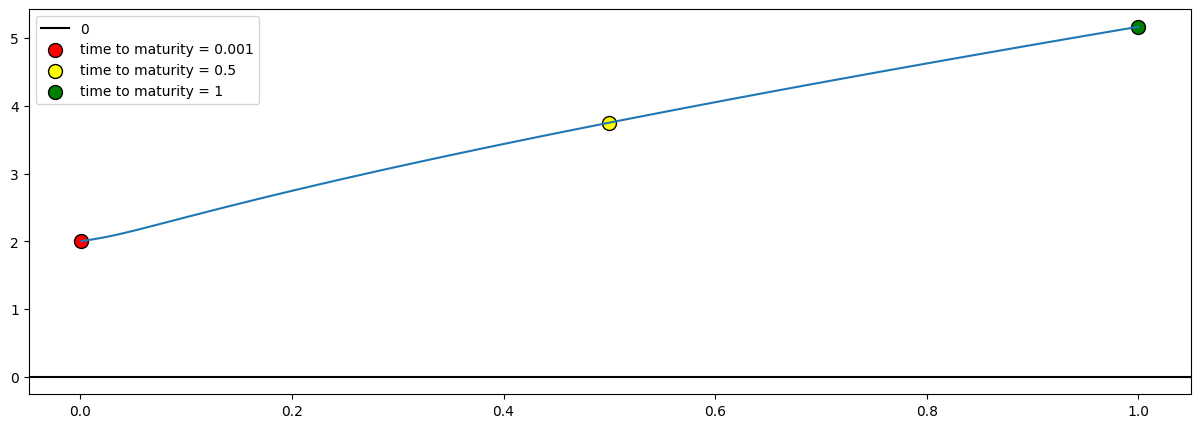

In [55]:
def get_call_price_for_time_and_sigma(t: float, sigma: float) -> float:
    return  BlackScholes(
        strike_price=60,
        current_price=62,
        risk_free_interest_rate=0.04,
        time_to_maturity=t,
        sigma=sigma,
    ).get_call_price()
    
sigma = 0.1
times_to_maturity = np.linspace(0.001, 1, 100)
call_prices = [
    get_call_price_for_time_and_sigma(t=t, sigma=sigma)
    for t in times_to_maturity
]

plt.figure(figsize=(15, 5))
plt.plot(times_to_maturity, call_prices)

for t, color in zip((0.001, 0.5, 1), ('red', 'yellow', 'green')):
    plt.scatter(
        t,
        get_call_price_for_time_and_sigma(t=t, sigma=sigma),
        edgecolors='black',
        color=color,
        s=100,
        label=f"time to maturity = {t}"
    )

plt.axhline(y=0, color='black', linestyle='-', label="0")
plt.legend()

### c) Repeat point b. for values of a put option

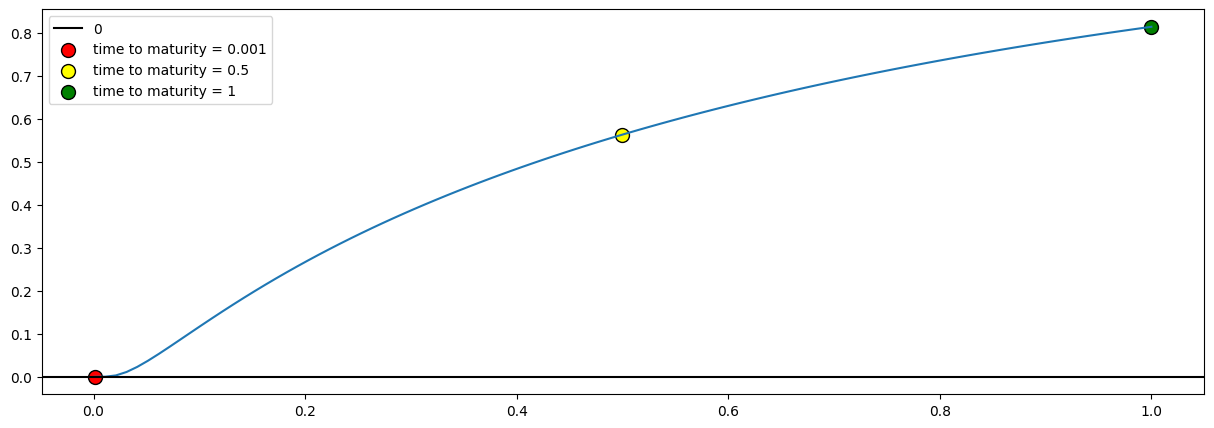

In [64]:
def get_put_price_for_time_and_sigma(t: float, sigma: float) -> float:
    return  BlackScholes(
        strike_price=60,
        current_price=62,
        risk_free_interest_rate=0.04,
        time_to_maturity=t,
        sigma=sigma,
    ).get_put_price()
    
sigma = 0.1
times_to_maturity = np.linspace(0.001, 1, 100)
call_prices = [
    get_put_price_for_time_and_sigma(t=t, sigma=sigma)
    for t in times_to_maturity
]

plt.figure(figsize=(15, 5))
plt.plot(times_to_maturity, call_prices)

for t, color in zip((0.001, 0.5, 1), ('red', 'yellow', 'green')):
    plt.scatter(
        t,
        get_put_price_for_time_and_sigma(t=t, sigma=sigma),
        edgecolors='black',
        color=color,
        s=100,
        label=f"time to maturity = {t}"
    )

plt.axhline(y=0, color='black', linestyle='-', label="0")
plt.legend()

### d) Repeat point b. for deltas of a call option

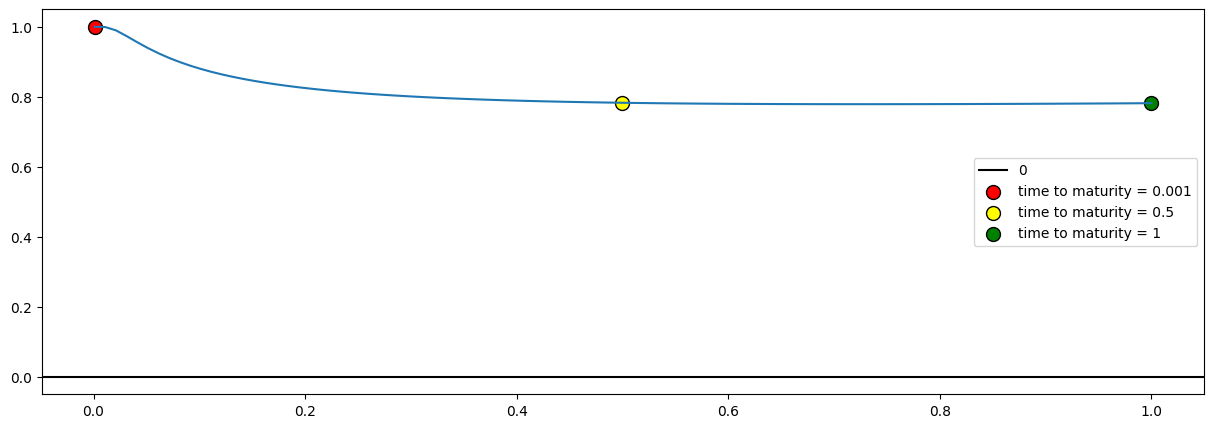

In [58]:
def get_delta_call_for_time_and_sigma(t: float, sigma: float) -> float:
    return  BlackScholes(
        strike_price=60,
        current_price=62,
        risk_free_interest_rate=0.04,
        time_to_maturity=t,
        sigma=sigma,
    ).delta_call
    
sigma = 0.1
times_to_maturity = np.linspace(0.001, 1, 100)
call_prices = [
    get_delta_call_for_time_and_sigma(t=t, sigma=sigma)
    for t in times_to_maturity
]

plt.figure(figsize=(15, 5))
plt.plot(times_to_maturity, call_prices)

for t, color in zip((0.001, 0.5, 1), ('red', 'yellow', 'green')):
    plt.scatter(
        t,
        get_delta_call_for_time_and_sigma(t=t, sigma=sigma),
        edgecolors='black',
        color=color,
        s=100,
        label=f"time to maturity = {t}"
    )

plt.axhline(y=0, color='black', linestyle='-', label="0")
plt.legend()

### e) Repeat point b. for deltas of a put option

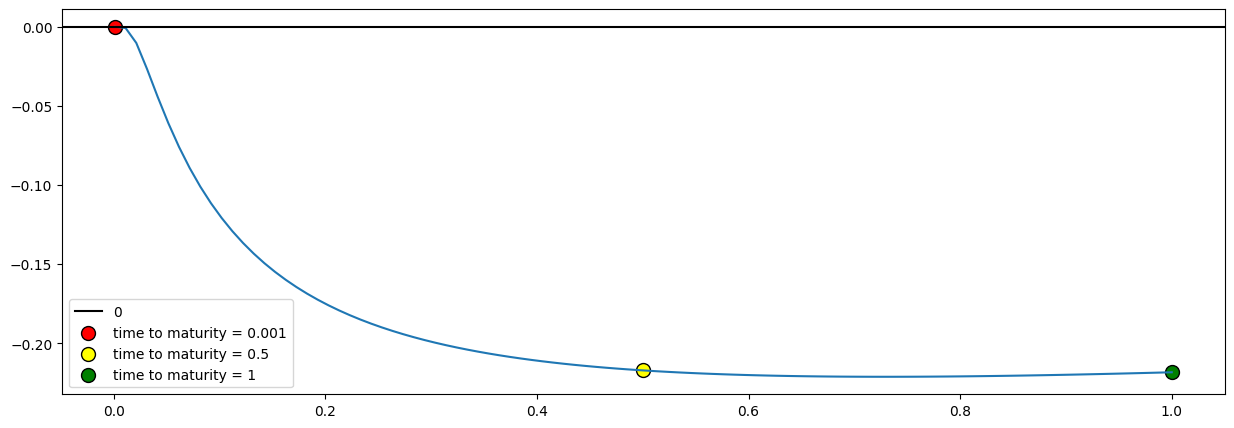

In [59]:
def get_delta_put_for_time_and_sigma(t: float, sigma: float) -> float:
    return  BlackScholes(
        strike_price=60,
        current_price=62,
        risk_free_interest_rate=0.04,
        time_to_maturity=t,
        sigma=sigma,
    ).delta_put
    
sigma = 0.1
times_to_maturity = np.linspace(0.001, 1, 100)
call_prices = [
    get_delta_put_for_time_and_sigma(t=t, sigma=sigma)
    for t in times_to_maturity
]

plt.figure(figsize=(15, 5))
plt.plot(times_to_maturity, call_prices)

for t, color in zip((0.001, 0.5, 1), ('red', 'yellow', 'green')):
    plt.scatter(
        t,
        get_delta_put_for_time_and_sigma(t=t, sigma=sigma),
        edgecolors='black',
        color=color,
        s=100,
        label=f"time to maturity = {t}"
    )

plt.axhline(y=0, color='black', linestyle='-', label="0")
plt.legend()

## 2. Repeat exercises 1b. and 1d. for a different volatility level (20%). What has changed compared to the case where 𝜎 = 10% and why?

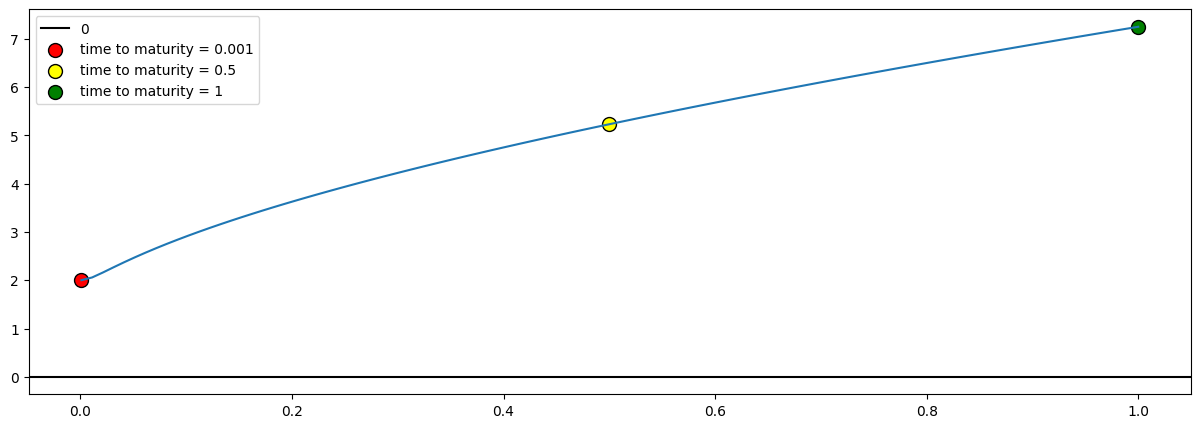

In [60]:
# 1 b)
def get_call_price_for_time_and_sigma(t: float, sigma: float) -> float:
    return  BlackScholes(
        strike_price=60,
        current_price=62,
        risk_free_interest_rate=0.04,
        time_to_maturity=t,
        sigma=sigma,
    ).get_call_price()
    
sigma = 0.2
times_to_maturity = np.linspace(0.001, 1, 100)
call_prices = [
    get_call_price_for_time_and_sigma(t=t, sigma=sigma)
    for t in times_to_maturity
]

plt.figure(figsize=(15, 5))
plt.plot(times_to_maturity, call_prices)

for t, color in zip((0.001, 0.5, 1), ('red', 'yellow', 'green')):
    plt.scatter(
        t,
        get_call_price_for_time_and_sigma(t=t, sigma=sigma),
        edgecolors='black',
        color=color,
        s=100,
        label=f"time to maturity = {t}"
    )

plt.axhline(y=0, color='black', linestyle='-', label="0")
plt.legend()

The call price for a higher sigma grows to a bigger value. <br>
The chances of all options finishing in the money increase when we increase sigma. <br>
One can also look at the formula of the Black-Scholes model, if we increase sigma, we increase d_1. <br>
(Trading options is actually trading the implied volatility.) <br>

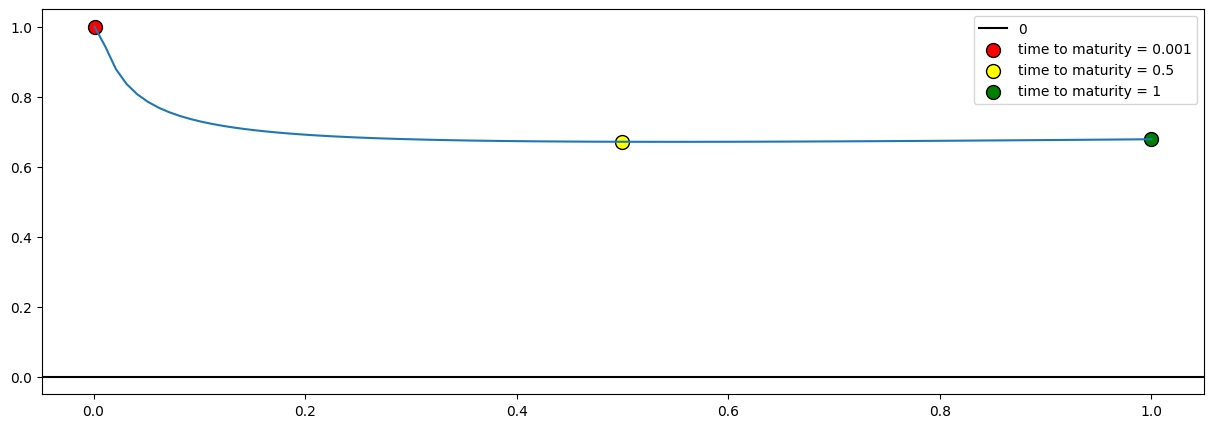

In [127]:
# 1 d)
def get_delta_call_for_time_and_sigma(t: float, sigma: float) -> float:
    return  BlackScholes(
        strike_price=60,
        current_price=62,
        risk_free_interest_rate=0.04,
        time_to_maturity=t,
        sigma=sigma,
    ).delta_call
    
sigma = 0.2
times_to_maturity = np.linspace(0.001, 1, 100)
call_prices = [
    get_delta_call_for_time_and_sigma(t=t, sigma=sigma)
    for t in times_to_maturity
]

plt.figure(figsize=(15, 5))
plt.plot(times_to_maturity, call_prices)

for t, color in zip((0.001, 0.5, 1), ('red', 'yellow', 'green')):
    plt.scatter(
        t,
        get_delta_call_for_time_and_sigma(t=t, sigma=sigma),
        edgecolors='black',
        color=color,
        s=100,
        label=f"time to maturity = {t}"
    )

plt.axhline(y=0, color='black', linestyle='-', label="0")
plt.legend()

In this case delta dropped lower. <br>
It means that d_1 also dropped. It happened because ... <br>

WTF co jest
jak sigma rosnie tzn ze d_1 tez powinno rosnac a nie spadac, tak jak chlop mowi tutaj
https://youtu.be/pr-u4LCFYEY?t=511

ale okazuje sie ze ta funkcja najpierw troche spada a potem rosnie (chyba)

0.045 / 0.1 = 0.44999999999999996
0.060000000000000005 / 0.2 = 0.3
0.08499999999999999 / 0.3 = 0.2833333333333333
0.12000000000000002 / 0.4 = 0.30000000000000004
0.165 / 0.5 = 0.33


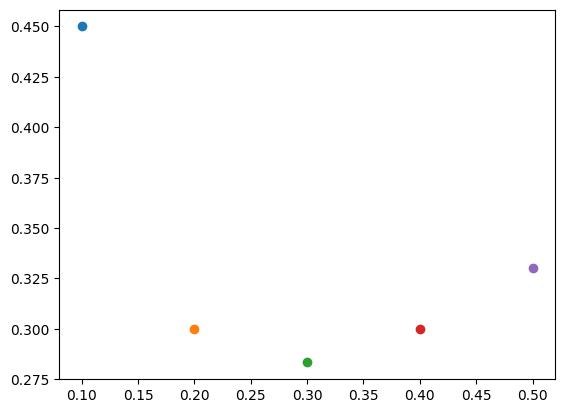

In [166]:
for sigma in (0.1, 0.2, 0.3, 0.4, 0.5):
    K = 60
    S = 62
    r = 0.04
    t = 40/365

    num =  r + (sigma ** 2) / 2
    den = sigma

    print(f"{num} / {den} = {num / den}")
    plt.scatter(sigma, num/den)

In [144]:
BlackScholes(
        strike_price=60,
        current_price=62,
        risk_free_interest_rate=0.04,
        time_to_maturity=40/365,
        sigma=0.3,
    ).d_1

0.42396278123845205

## 3. How would you calculate a value of a contract paying 1 unit of cash, if stock price on maturity is above some level 𝐾 (i.e. 𝑆𝑇 > 𝐾), 0 otherwise. Explain your reasoning.

We are getting payed 1 unit of cash if by the end of the contract price is above the strike price. <br>

Black Scholes model looks generic enough to be able to tackle this problem.

...

In [73]:
norm.cdf(5)

0.9999997133484281